In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load dataset
df = pd.read_csv("heart.csv")

In [8]:
# Display all columns
print("Columns:", df.columns)

Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [9]:
# Display first and last rows
print("First 5 rows:\n", df.head())
print("Last 5 rows:\n", df.tail())

First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Last 5 rows:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0      1.0      164      1      0.0   
1021   60    1   0       125   258    0      0.0      141      1      2.8   
1022   47    1   0       110   275    0      0.0      118      1      1.0   
1023   50    0   0       110   254    0     

In [10]:
# Display descriptive statistics
print("Descriptive Statistics:\n", df.describe())

Descriptive Statistics:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1024.000000  1025.000000  1025.000000  1023.000000   
mean      0.149268     0.529297   149.114146     0.336585     1.072043   
std       0.356527     0.527931    23.005724     0.472772     1.176008   
min       0.000000   

In [11]:
# Check and handle missing values
df.fillna(df.mean(), inplace=True)
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [12]:
# Check for outliers in cholesterol column
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['chol'] < (Q1 - 1.5 * IQR)) | (df['chol'] > (Q3 + 1.5 * IQR))
df = df[~outlier_condition]

In [13]:
# Data shape before and after processing
print("Shape before processing:", df.shape)

Shape before processing: (1009, 14)


In [14]:
# Compute statistics
print("Mean Cholesterol:", df['chol'].mean())
print("Median Cholesterol:", df['chol'].median())
print("Standard Deviation of Cholesterol:", df['chol'].std())
print("Mean Blood Pressure for heart disease patients:", df[df['target'] == 1]['trestbps'].mean())
print("Mean Blood Pressure for non-heart disease patients:", df[df['target'] == 0]['trestbps'].mean())
print("Max Heart Rate:", df['thalach'].max())
print("Min Heart Rate:", df['thalach'].min())

Mean Cholesterol: 242.98315163528247
Median Cholesterol: 239.0
Standard Deviation of Cholesterol: 45.3851322761541
Mean Blood Pressure for heart disease patients: 129.20309477756285
Mean Blood Pressure for non-heart disease patients: 133.97764227642276
Max Heart Rate: 202
Min Heart Rate: 71


In [15]:
# Sorting and searching
df_sorted = df.sort_values(by='chol', ascending=False)
high_chol_patients = df[df['chol'] > 300]
old_abnormal_ecg = df[(df['age'] > 60) & (df['restecg'] > 0)]

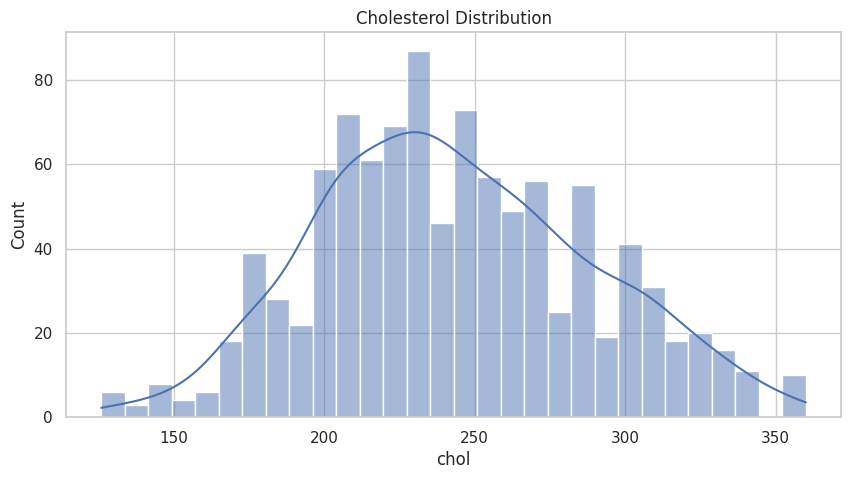

In [16]:
# Data Visualization
plt.figure(figsize=(10,5))
sns.histplot(df['chol'], bins=30, kde=True)
plt.title("Cholesterol Distribution")
plt.show()

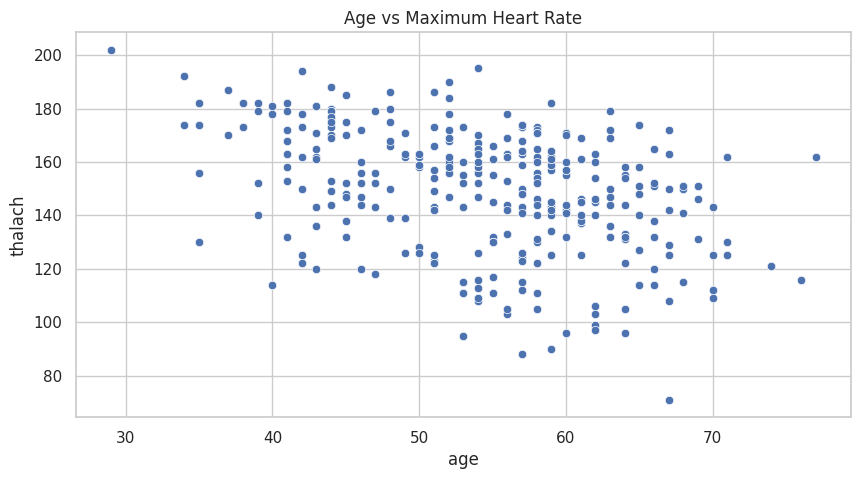

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['age'], y=df['thalach'])
plt.title("Age vs Maximum Heart Rate")
plt.show()

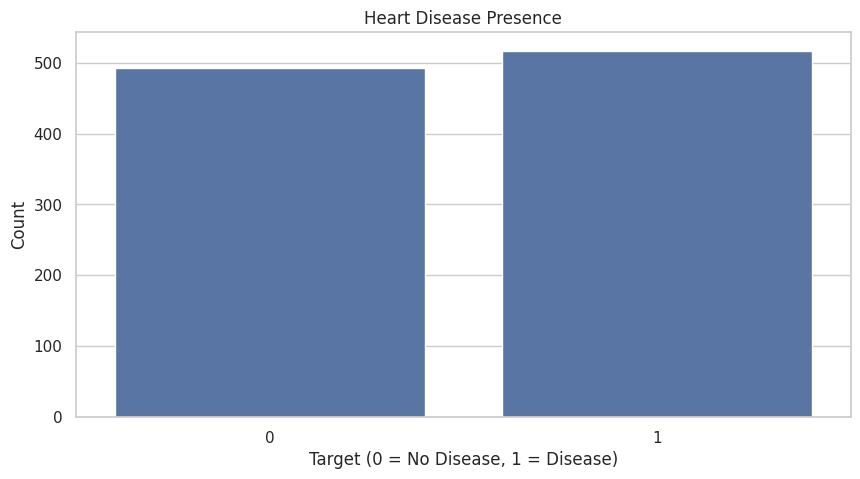

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['target'].value_counts().index, y=df['target'].value_counts().values)
plt.title("Heart Disease Presence")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

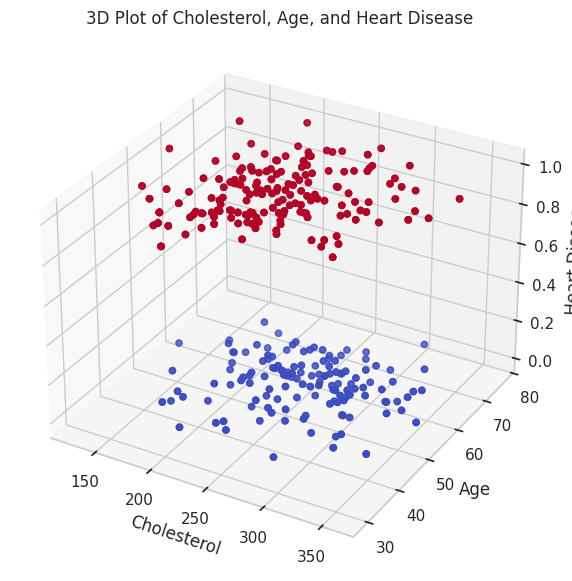

In [19]:
# 3D Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['chol'], df['age'], df['target'], c=df['target'], cmap='coolwarm')
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Age')
ax.set_zlabel('Heart Disease')
plt.title("3D Plot of Cholesterol, Age, and Heart Disease")
plt.show()

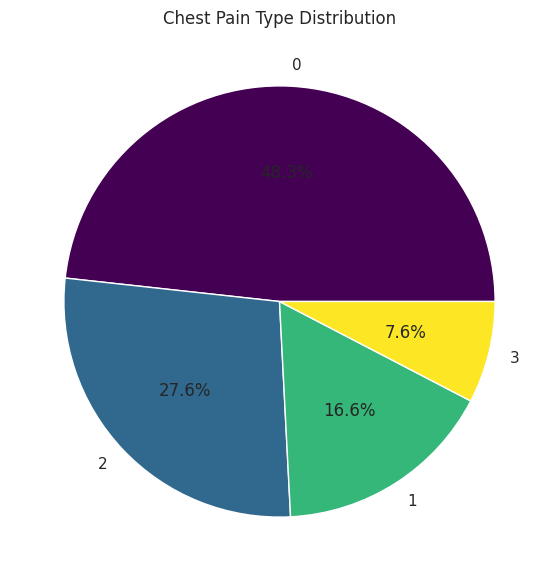

In [20]:
# Pie Chart
plt.figure(figsize=(7,7))
df['cp'].value_counts().plot.pie(autopct="%1.1f%%", cmap='viridis')
plt.title("Chest Pain Type Distribution")
plt.ylabel('')
plt.show()